In [3]:
# Import Your Libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.exposure import match_histograms

## Part 1

In [ ]:
path = r'E:\University\Term7\FCV\Homeworks\HW3\Images'
source = plt.imread(os.path.join(path,'A Plague Tale.jpg'))
reference = plt.imread(os.path.join(path,'Hades.jpg'))

### YOUR CODE ###
# START
matched = match_histograms(source, reference, multichannel=True)
# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

## Part 2

In [9]:
from matplotlib import image


def hist_matching(src_image, ref_image):
  '''
  inputs:
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output:
    output_image (ndarray): transformed image 
  '''
  
  ### YOUR CODE ###
  # START
  k = 255
  w = src_image.shape[0]
  h = src_image.shape[1]
  output_image = src_image.copy()
  
  for c in range(3):
      #numpy.histogram(data, bins=10, range=None, normed=None, weights=None, density=None)
      src_hist,bins = np.histogram(src_image[:,:,c].flatten(),k,normed=True)
      ref_hist,bins = np.histogram(ref_image[:,:,c].flatten(),k,normed=True)

      cdf_src = src_hist.cumsum()
      cdf_src = (255 * cdf_src / cdf_src[-1]).astype(np.uint8)

      cdf_ref = ref_hist.cumsum()
      cdf_ref = (255 * cdf_ref / cdf_ref[-1]).astype(np.uint8)

      #numpy.interp(x, xp, fp, left=None, right=None, period=None)
      res2 = np.interp(src_image[:,:,c].flatten(),bins[:-1],cdf_src)
      res3 = np.interp(res2,cdf_ref, bins[:-1])

      output_image[:,:,c] = res3.reshape((w, h))
      matched = output_image
  # END

  return matched

In [ ]:
path = r'E:\University\Term7\FCV\Homeworks\HW3\Images'
source = plt.imread(os.path.join(path,'A Plague Tale.jpg'))
reference = plt.imread(os.path.join(path,'Hades.jpg'))

### YOUR CODE ###
# START
matched = hist_matching(source, reference)
# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

## Part 3

C:\Users\user\AppData\Local\Temp\ipykernel_16188\4027506539.py:5: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched = match_histograms(reference, source, multichannel=True)


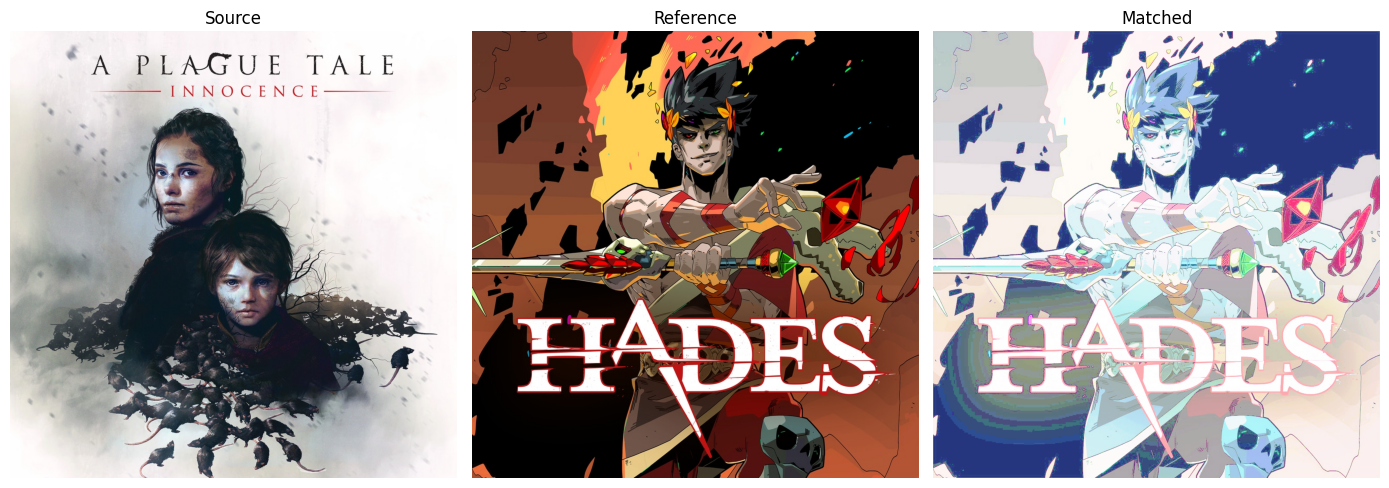

C:\Users\user\AppData\Local\Temp\ipykernel_16188\1343319546.py:15: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  imhist,bins = np.histogram(src_image[:,:,d].flatten(),L,normed=True)
C:\Users\user\AppData\Local\Temp\ipykernel_16188\1343319546.py:16: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  tinthist,bins = np.histogram(ref_image[:,:,d].flatten(),L,normed=True)


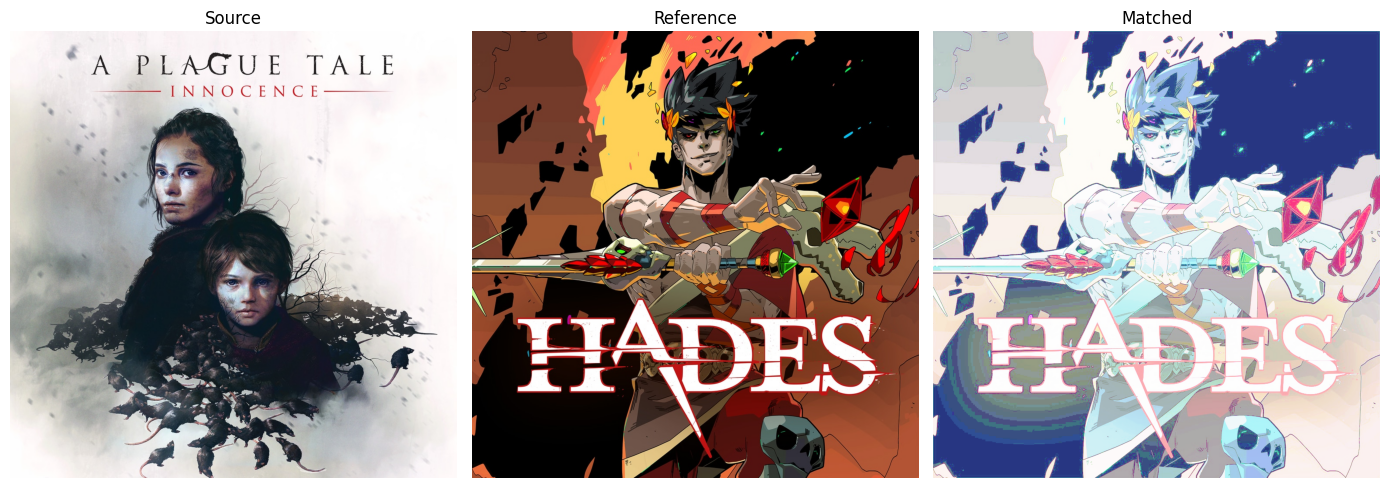

In [11]:
# match_histograms OpenCV
path = r'E:\University\Term7\FCV\Homeworks\HW3\Images'
source = plt.imread(os.path.join(path,'A Plague Tale.jpg'))
reference = plt.imread(os.path.join(path,'Hades.jpg'))
matched = match_histograms(reference, source, multichannel=True)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()
ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')
plt.tight_layout()
plt.show()

# histogram matching implementation
path = r'E:\University\Term7\FCV\Homeworks\HW3\Images'
source = plt.imread(os.path.join(path,'A Plague Tale.jpg'))
reference = plt.imread(os.path.join(path,'Hades.jpg'))
matched = hist_matching(reference, source)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()
ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')
plt.tight_layout()
plt.show()